In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BTC.csv to BTC (1).csv


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. Reading CSV
BTCdata = pd.read_csv(io.BytesIO(uploaded['BTC.csv']), thousands=',')

In [ ]:
# 2. Reversing the data
BTCdata = BTCdata.iloc[::-1]
BTCdata

,Date,Price,Open,High,Low,Vol.,Change %
1096,"Jan 17, 2019",3626.4,3588.1,3636.7,3554.8,525.10K,1.07%
1095,"Jan 18, 2019",3605.6,3626.3,3627.9,3575.7,488.16K,-0.57%
1094,"Jan 19, 2019",3677.8,3605.8,3715.2,3604.1,537.06K,2.00%
1093,"Jan 20, 2019",3542.3,3676.2,3699.1,3503.9,563.31K,-3.68%
1092,"Jan 21, 2019",3536.7,3542.7,3561.4,3505.4,394.17K,-0.16%
...,...,...,...,...,...,...,...
4,"Jan 13, 2022",42560.0,43900.0,44404.7,42337.5,53.42K,-3.05%
3,"Jan 14, 2022",43073.3,42562.2,43435.1,41848.7,50.50K,1.21%
2,"Jan 15, 2022",43097.0,43073.6,43777.9,42586.1,31.44K,0.06%
1,"Jan 16, 2022",43079.1,43079.2,43462.0,42643.3,28.66K,-0.04%


In [ ]:
# 3. Simplify dataframe
BTCdataPrice = BTCdata.reset_index()['Price']
BTCdataPrice = BTCdataPrice[:].reset_index()['Price']
BTCdataPrice

0        3626.4
1        3605.6
2        3677.8
3        3542.3
4        3536.7
         ...   
1092    42560.0
1093    43073.3
1094    43097.0
1095    43079.1
1096    42638.9
Name: Price, Length: 1097, dtype: float64

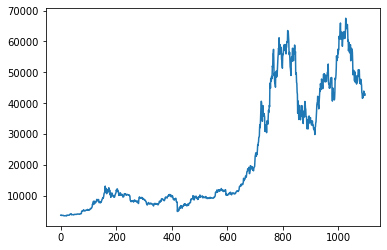

In [ ]:
# 4. Plotting the data
plt.plot(BTCdataPrice)

In [ ]:
# 4. Normalization the data
scaler = MinMaxScaler(feature_range=(0,1))
BTCdataNorm = scaler.fit_transform(np.array(BTCdataPrice).reshape(-1,1))

In [ ]:
# 5. Splitting dataset into train and test split
length = 50
predSize = 0
splitFactor = 0.7

trainSize = int((len(BTCdataNorm) - predSize) * splitFactor)
testSize = (len(BTCdataNorm) - predSize) - trainSize

BTCreshaped = BTCdataNorm.reshape(-1, 1)
traindata, testdata = BTCreshaped[0:trainSize, :], BTCreshaped[trainSize - length:trainSize + testSize, :1]

In [ ]:
# 6. Create sequences
def generateSequences(data, seqLength=1):
  seq = []
  for i in range(len(data) - seqLength):
    seq.append(data[i:(seqLength + i)])
  return np.array(seq)

In [ ]:
trainX = generateSequences(traindata, seqLength = length)
trainY = traindata[length:].reshape(-1)
testX = generateSequences(testdata, seqLength = length)
testY = testdata[length:].reshape(-1)

In [ ]:
# 7. Create Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 50, 50)            10400     
                                                                 
 dropout_27 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_37 (LSTM)              (None, 50, 50)            20200     
                                                                 
 dropout_28 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_38 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 1)               

In [ ]:
# 8. Feed the model with data
history = model.fit(trainX, trainY,epochs=100, batch_size=8,verbose=1)

Epoch 1/100
90/90 [==============================] - 9s 36ms/step - loss: 0.0043
Epoch 2/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0026
Epoch 3/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0014
Epoch 4/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0012
Epoch 5/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0013
Epoch 6/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0011
Epoch 7/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0017
Epoch 8/100
90/90 [==============================] - 3s 35ms/step - loss: 0.0011
Epoch 9/100
90/90 [==============================] - 3s 35ms/step - loss: 8.7356e-04
Epoch 10/100
90/90 [==============================] - 3s 35ms/step - loss: 8.1616e-04
Epoch 11/100
90/90 [==============================] - 3s 36ms/step - loss: 9.5962e-04
Epoch 12/100
90/90 [==============================] - 3s 35ms/step - loss: 6.9967e-04
Epoch 13/

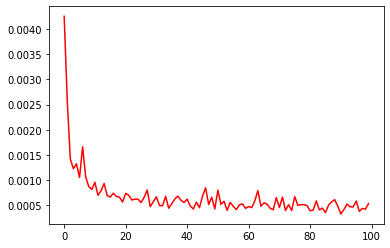

In [ ]:
# 9. Plotting how the loss has been changing through the learning process
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')

In [ ]:
# 10. Make predictions on train and test data
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)

In [ ]:
# 11. Inverse normalization (Back to previous values)
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)

In [ ]:
# 12. Evaluate model
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(trainY, trainPredictions))

14835.049724326293

In [ ]:
math.sqrt(mean_squared_error(testY, testPredictions))

51262.8740322413

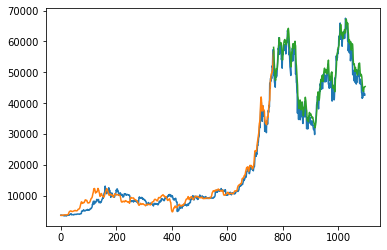

In [ ]:
# 13. Plot BTCdataPrice, trainedPredictions and testPredictions
YtrainPredictedToPlot = trainPredictions.reshape(-1)
XtrainToPlot = np.linspace(0, trainSize, len(YtrainPredictedToPlot))

YtestPredictedToPlot = testPredictions.reshape(-1)
XtestToPlot = np.linspace(trainSize, trainSize + testSize, len(YtestPredictedToPlot))

# Blue - original data
# Orange - train predictions
# Green - test predictions
plt.plot(BTCdataPrice)
plt.plot(XtrainToPlot, YtrainPredictedToPlot)
plt.plot(XtestToPlot, YtestPredictedToPlot)

In [ ]:
# 13. Predict future
TempInput = testY
TempInput = TempInput[-length-1:].tolist()
PredictedOutput = []
nPredictions = 120
i = 0
while(i < nPredictions):  
    if len(TempInput) > length:
      InputX = np.array(TempInput[1:])
      InputX = InputX.reshape(1, length, 1)

      newPredictedValue = model.predict(InputX)     
      TempInput.extend(newPredictedValue[0].tolist())
      TempInput = TempInput[1:]
      PredictedOutput.extend(newPredictedValue.tolist())

      i = i+1
    else:
      InputX = InputX.reshape(1, length, 1)
      newPredictedValue = model.predict(InputX)

      TempInput.extend(newPredictedValue[0].tolist()) 
      PredictedOutput.extend(newPredictedValue.tolist())
      i=i+1

In [ ]:
# 14. Denormalization predicted data
PredictedOutput = scaler.inverse_transform(PredictedOutput)
PredictedOutput = PredictedOutput.reshape(-1)
xFuture = np.linspace(trainSize + testSize, trainSize + testSize + nPredictions, nPredictions)

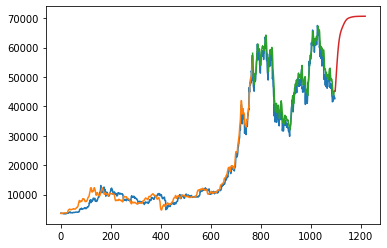

In [ ]:
# 15. Plotting future data forecasted by the model

# Blue - original data
# Orange - train predictions
# Green - test predictions
# Red - future predictions
plt.plot(BTCdataPrice)
plt.plot(XtrainToPlot, YtrainPredictedToPlot)
plt.plot(XtestToPlot, YtestPredictedToPlot)
plt.plot(xFuture, PredictedOutput)